<h1 style="text-align: center;">ENCS5341 Machine Learning and Data Science</h1>
<h2 style="text-align: center;">Assignment #2</h2>
<h3 style="text-align: center;">
    <span style="margin-right: 40px;">Name: Osaid Hamza</span>
    <span>ID: 1200875</span>
</h3>

## Model Selection and Hyper-parameters Tunning

### Q1: Data Split and 3D Plot Visualization
In this section, the data_reg.csv dataset was initially loaded and divided into three distinct sets: `Training`, `Validation`, and `Testing`, consisting of 120, 40, and 40 rows respectively. Following this segmentation, a 3D scatter plot was created to visually represent these data subsets. 

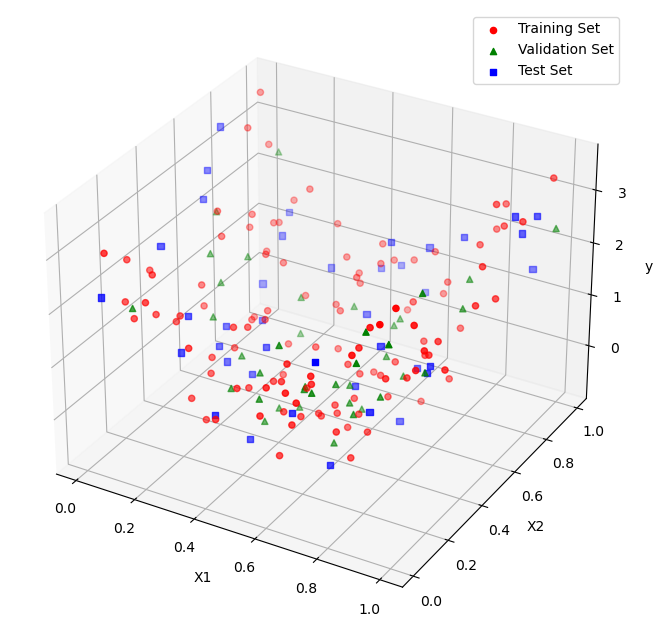

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# load the data from the file
data = pd.read_csv('data_reg.csv')

# Split the data into training, validation, and testing sets
train, vt = train_test_split(data, train_size=120, shuffle=False)
validation, test = train_test_split(vt, train_size=40, shuffle=False)

# Separate the features and labels for each set
x_train, y_train = train[['x1', 'x2']], train['y']
x_validation, y_validation = validation[['x1', 'x2']], validation['y']
x_test, y_test = test[['x1', 'x2']], test['y']

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each set in different colors
ax.scatter(x_train['x1'], x_train['x2'], y_train, c='r', marker='o', label='Training Set')
ax.scatter(x_validation['x1'], x_validation['x2'], y_validation, c='g', marker='^', label='Validation Set')
ax.scatter(x_test['x1'], x_test['x2'], y_test, c='b', marker='s', label='Test Set')

# Label the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# Adding a legend (label for each color)
ax.legend()

# Show plot
plt.show()

This 3D scatter plot is crucial for data analysis, highlighting how the data spans across training, validation, and testing sets. It provides key insights into the model's generalization capabilities and guides effective model development.


### Q2: Polynomial Regression Analysis

In this code, polynomial regression models with degrees ranging from 1 to 10 are applied to the `data_reg.csv` dataset. It involves transforming data into polynomial features, fitting models, and evaluating them using mean squared error. The results are visually represented through a plot of validation errors versus polynomial degrees and 3D surface plots for each degree, offering insights into model performance and optimal complexity.



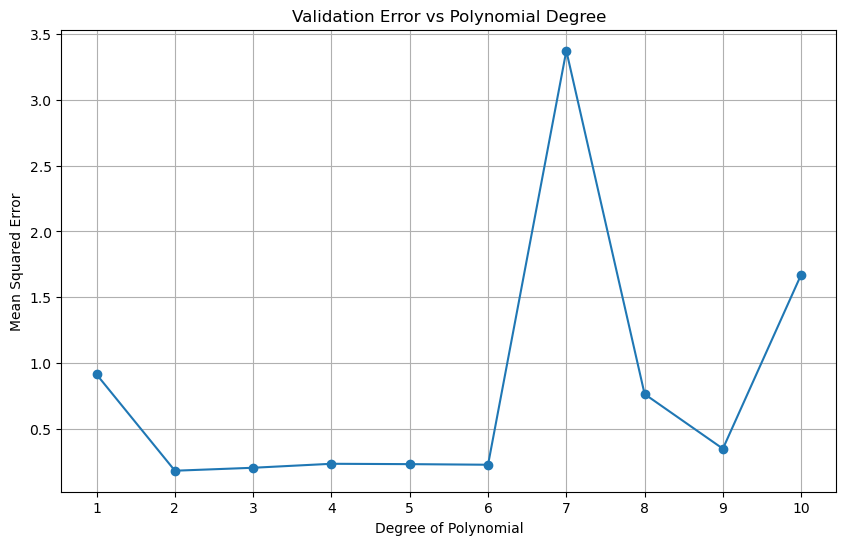

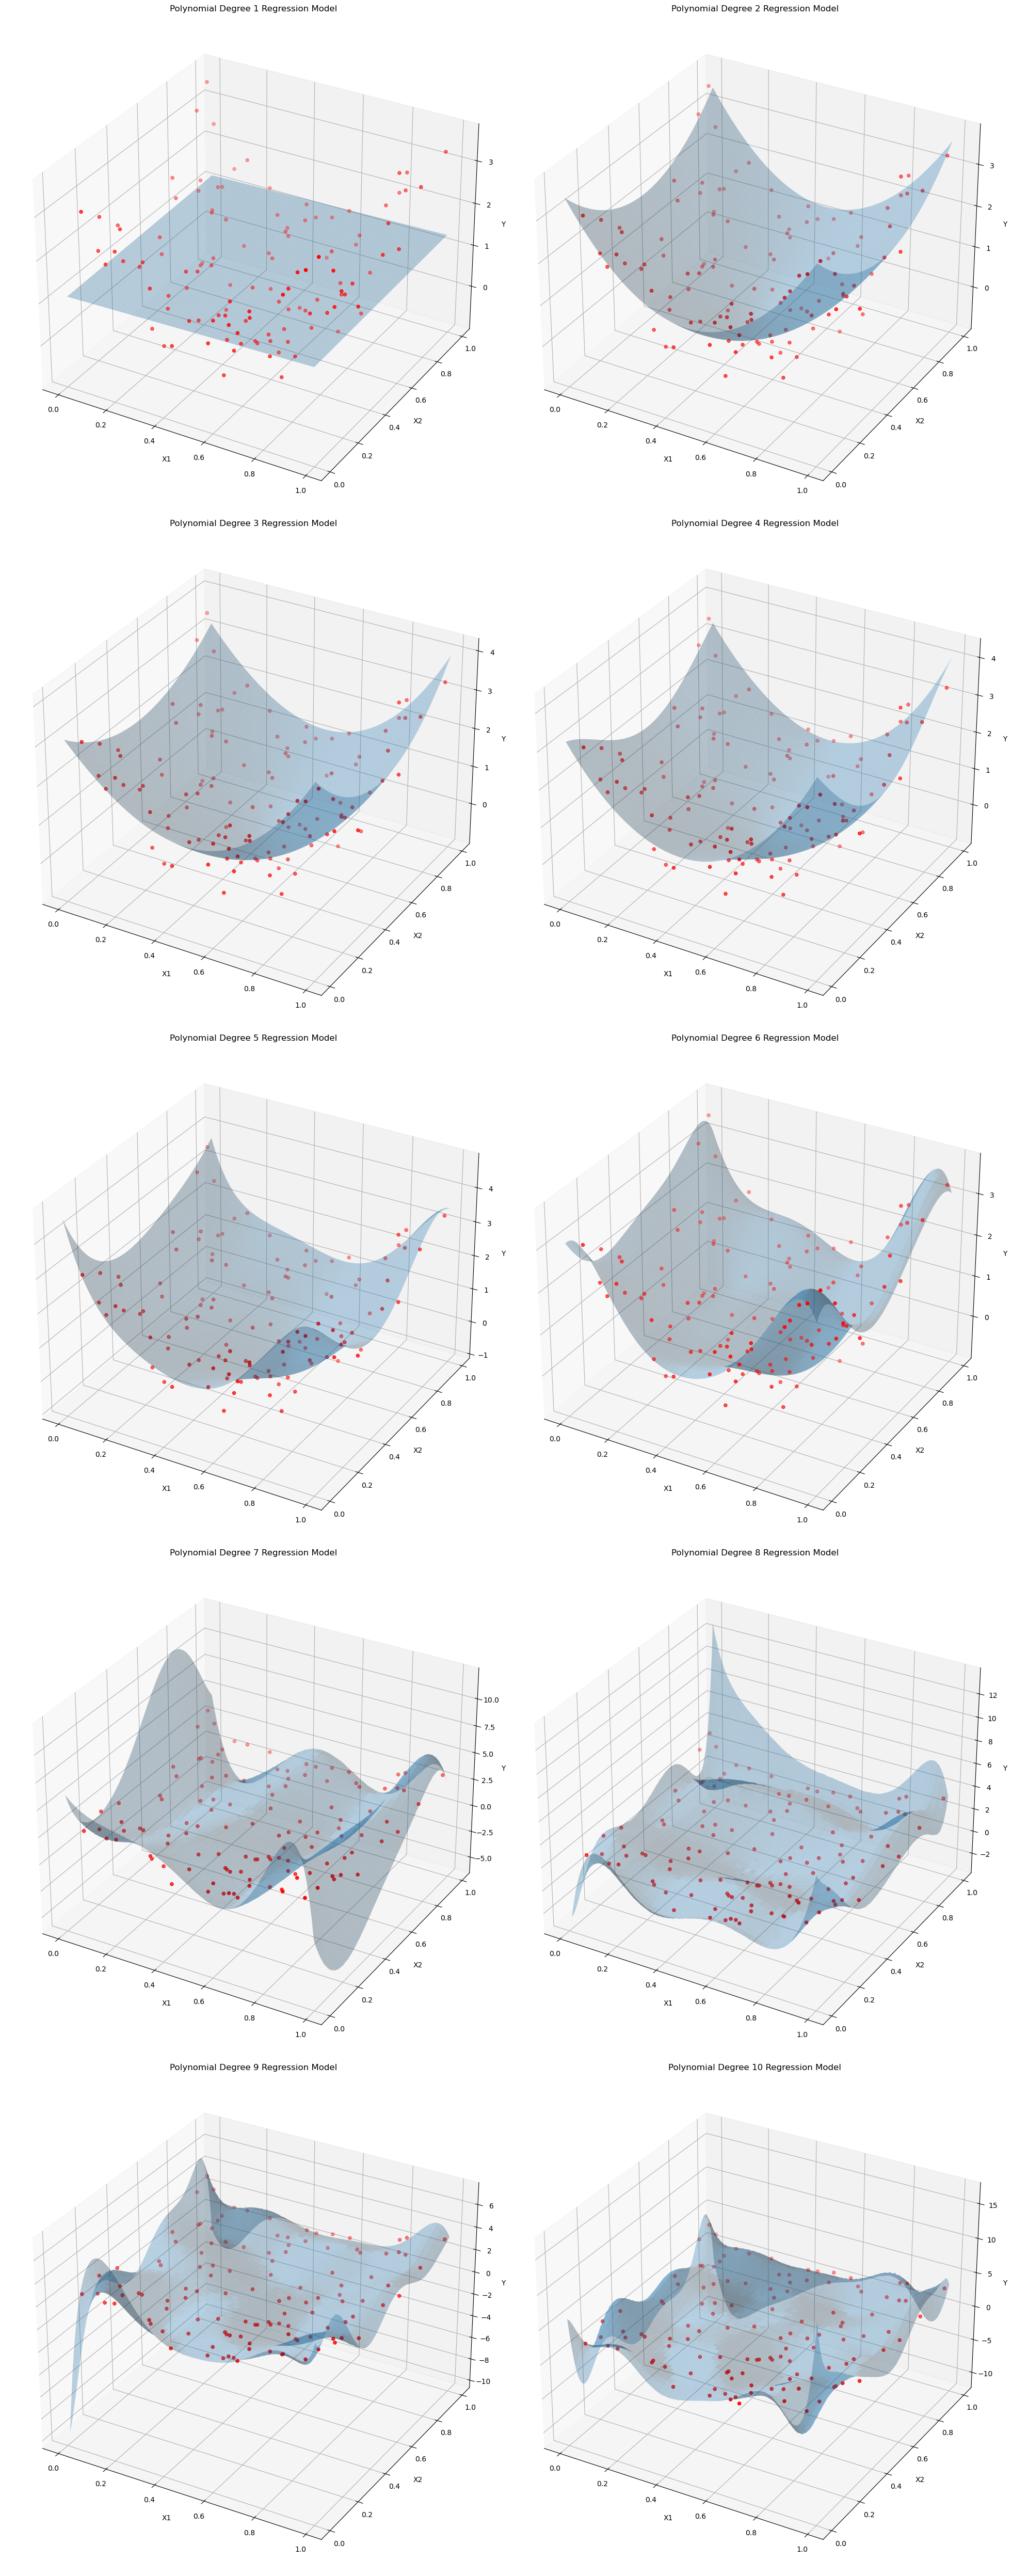

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data
file_path = 'data_reg.csv'
data = pd.read_csv(file_path)

# Apply polynomial regression for degrees 1 to 10
validation_errors = []
models = []
degrees = range(1, 11)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train)
    X_validation_poly = poly.transform(x_validation)
    model = LinearRegression().fit(X_train_poly, y_train)
    models.append(model)
    Y_validation_pred = model.predict(X_validation_poly)
    error = mean_squared_error(y_validation, Y_validation_pred)
    validation_errors.append(error)

# Plotting the validation error vs polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Function to plot the surface for a given polynomial degree and model
def plot_surface(degree, model, ax):
    x1_range = np.linspace(x_train['x1'].min(), x_train['x1'].max(), 100)
    x2_range = np.linspace(x_train['x2'].min(), x_train['x2'].max(), 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    X_poly = PolynomialFeatures(degree=degree).fit_transform(np.column_stack([X1.ravel(), X2.ravel()]))
    Y_pred = model.predict(X_poly).reshape(X1.shape)
    ax.plot_surface(X1, X2, Y_pred, alpha=0.3)
    ax.scatter(x_train['x1'], x_train['x2'], y_train, c='r', marker='o')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title(f'Polynomial Degree {degree} Regression Model')
    
fig = plt.figure(figsize=(20, 50))

# Loop through each degree and plot the surface
for i, model in enumerate(models, 1):
    ax = fig.add_subplot(5, 2, i, projection='3d')
    plot_surface(i, model, ax)

# plot the figures
plt.tight_layout()
plt.show()

The displayed plot shows mean squared error (MSE) against polynomial degrees 1 to 10. The lowest MSE at degree 2 suggests it as the best fit for the dataset, with errors rising sharply at higher degrees, indicating overfitting. Thus, a `second-degree polynomial` is identified as optimal for modeling this data.


### Q3: Ridge Regression

The code applies an 8th degree polynomial ridge regression to the training set, evaluating the MSE for various regularization strengths. The goal is to find the `alpha` that minimizes the validation MSE, which is essential for a well-generalized model.


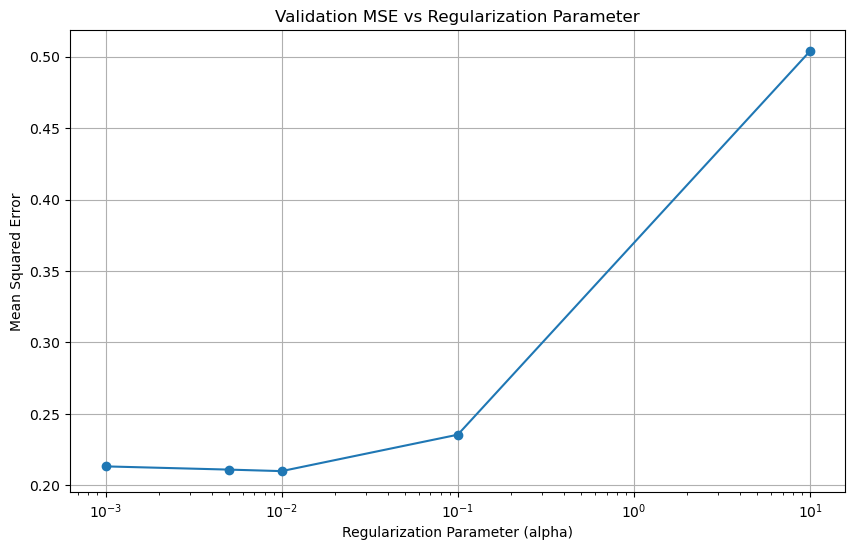

In [13]:
from sklearn.linear_model import Ridge

# Define the polynomial degree
degree = 8

# Regularization parameter options
regularization_params = [0.001, 0.005, 0.01, 0.1, 10]

# Apply polynomial features transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train)
X_validation_poly = poly.transform(x_validation)

# Initialize list to store validation errors
ridge_validation_errors = []

# Apply ridge regression with different regularization parameters
for param in regularization_params:
    ridge_model = Ridge(alpha=param).fit(X_train_poly, y_train)
    Y_validation_pred = ridge_model.predict(X_validation_poly)
    error = mean_squared_error(y_validation, Y_validation_pred)
    ridge_validation_errors.append(error)

# Plot the MSE on the validation vs the regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(regularization_params, ridge_validation_errors, marker='o')
plt.title('Validation MSE vs Regularization Parameter')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Because the parameters span several orders of magnitude
plt.grid(True)
plt.show()

The plot shows the validation MSE for a polynomial ridge regression model of degree 8 across various regularization strengths (`alpha`). The lowest MSE is achieved at `alpha` = 0.01, suggesting that it is the best value for alpha, effectively balancing bias and variance in the model.

## Logistic Regression

### Q1: Linear Logistic Regression
This code implements logistic regression for binary classification using `train_cls.csv` and `test_cls.csv`. Key steps include loading data, converting class labels to numeric, training a logistic regression model, and calculating accuracy. It also visualizes the decision boundary on a scatter plot to assess the model's classification capability.


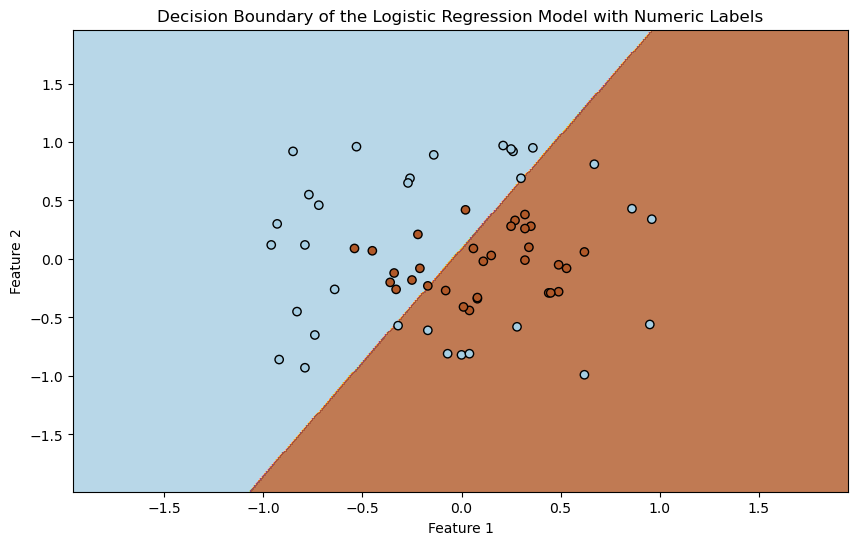

Training Accuracy: 66.13%
Testing Accuracy: 68.18%


In [17]:
# Modified code to address the warning

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

# Convert class labels to numeric
y_train_numeric = train_data['class'].astype('category').cat.codes
y_test_numeric = test_data['class'].astype('category').cat.codes

# Separate features from the datasets
X_train = train_data.drop('class', axis=1)
X_test = test_data.drop('class', axis=1)

# Train the logistic regression model with a linear decision boundary
logreg = LogisticRegression()
logreg.fit(X_train, y_train_numeric)

# Compute the training and testing accuracy
train_accuracy_numeric = accuracy_score(y_train_numeric, logreg.predict(X_train))
test_accuracy_numeric = accuracy_score(y_test_numeric, logreg.predict(X_test))

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Convert mesh grid to DataFrame with the same column names as X_train for prediction
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns)
Z_numeric = logreg.predict(mesh_data)
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the decision boundary with numeric labels
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_numeric, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Logistic Regression Model with Numeric Labels')

# Display the plot
plt.show()

# Output the computed accuracies
print(f"Training Accuracy: {train_accuracy_numeric * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy_numeric * 100:.2f}%")



The logistic regression model shows training and testing accuracies of 66.13% and 68.18%, respectively. The decision boundary plot indicates moderate performance, suggesting possible underfitting. This implies the model's simplicity may not adequately capture the dataset's complexity, affecting its overall predictive ability.

### Q2: Quadratic Logistic Regression
A logistic regression model was trained with polynomial features to create a quadratic decision boundary. Accuracy was calculated for both training and testing data, and the decision boundary was plotted to show the model's fit.


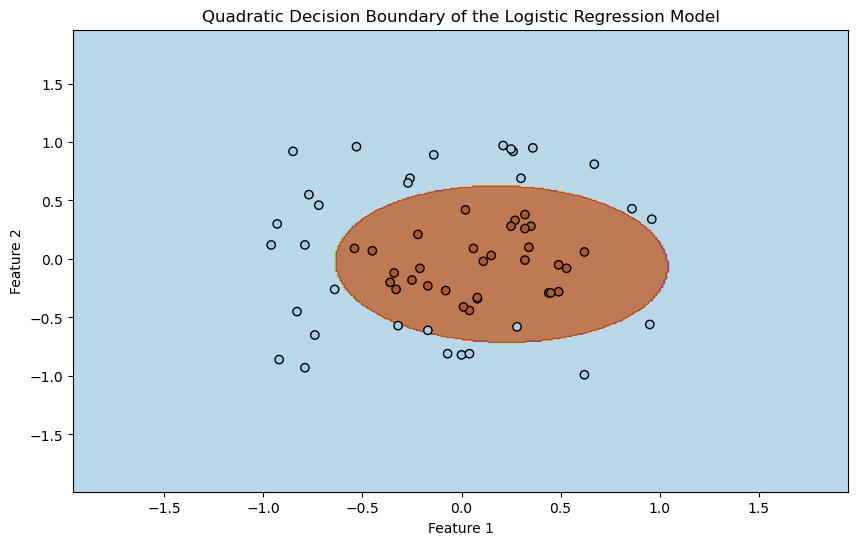

Training Accuracy: 96.77%
Testing Accuracy: 95.45%


In [21]:
# Create polynomial features (degree 2) for quadratic decision boundary
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
feature_names = poly.get_feature_names_out(X_train.columns)

# Transform the training and testing data into DataFrame with feature names
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)
X_test_poly_df = pd.DataFrame(poly.transform(X_test), columns=feature_names)

# Train the logistic regression model on the polynomial features DataFrame
quad_logreg = LogisticRegression()
quad_logreg.fit(X_train_poly_df, y_train_numeric)

# Compute the training and testing accuracy
train_accuracy_quad = accuracy_score(y_train_numeric, quad_logreg.predict(X_train_poly_df))
test_accuracy_quad = accuracy_score(y_test_numeric, quad_logreg.predict(X_test_poly_df))

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Convert mesh grid to DataFrame before polynomial transformation
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns)
mesh_poly_df = pd.DataFrame(poly.transform(mesh_data), columns=feature_names)

# Predict the labels for the grid using the quadratic model
Z_quad = quad_logreg.predict(mesh_poly_df)
Z_quad = Z_quad.reshape(xx.shape)

# Plot the decision boundary for the quadratic model
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_quad, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_numeric, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Quadratic Decision Boundary of the Logistic Regression Model')

# Display the plot
plt.show()

# Print the computed accuracies for the quadratic model
print(f"Training Accuracy: {train_accuracy_quad * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy_quad * 100:.2f}%")

The model shows a training accuracy of 96.77% and testing accuracy of 95.45%. The decision boundary plot indicates a good fit, with the model accurately classifying most points.

### Q3: Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.

The linear logistic regression model, which had relatively close training and testing accuracies, suggested a balanced model without severe overfitting. However, the accuracies were not very high, pointing towards a model that may be too simple, risking underfitting by not fully capturing the data's complexity.

On the other hand, the enhanced model with a quadratic decision boundary adapted better to the data's intricacies, as reflected by the high accuracy on both training and testing sets. This indicates a good fit, with the model being complex enough to capture patterns without being over-specialized to the training data, hence avoiding overfitting.